# Layoffs dataset 2020-2024 - Exploratory Data Analyis(EDA)
## (Understanding Trends and Patterns)
-by kanika Arya

-This dataset is taken from kaggle

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv('layoffs_data.csv')

In [3]:
#first five rows of dataset
df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25T00:00:00.000Z,https://techcrunch.com/2024/04/25/defense-spac...,158.0,Series B,2024-04-26T15:58:59.000Z,United States,Unknown
1,Grin,Sacramento,Marketing,NaN,NaN,2024-04-25T00:00:00.000Z,https://www.businessinsider.com/influencer-mar...,145.0,Series B,2024-04-27T00:09:09.000Z,United States,Unknown
2,Expedia,Austin,Travel,NaN,NaN,2024-04-24T00:00:00.000Z,https://www.bizjournals.com/austin/news/2024/0...,3300.0,Post-IPO,2024-04-25T16:09:19.000Z,United States,Unknown
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23T00:00:00.000Z,https://www.sfchronicle.com/bayarea/article/te...,1400.0,Series E,2024-04-24T15:01:03.000Z,United States,Unknown
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23T00:00:00.000Z,https://cc.cz/heureka-hromadne-propustila-stov...,NaN,Acquired,2024-04-24T15:06:41.000Z,Czech Republic,Unknown


In [4]:
#last five rows of dataset
df.tail()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
3572,Service,Los Angeles,Travel,NaN,1.00,2020-03-16T00:00:00.000Z,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31T15:17:26.000Z,United States,Unknown
3573,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13T00:00:00.000Z,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03T04:47:03.000Z,United States,Unknown
3574,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13T00:00:00.000Z,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17T00:12:49.000Z,United States,Unknown
3575,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12T00:00:00.000Z,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31T16:04:23.000Z,United States,Unknown
3576,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11T00:00:00.000Z,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31T13:21:54.000Z,United States,Unknown


In [5]:
#rows and columns
df.shape

(3577, 12)

In [6]:
df.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,2342.000000,2300.000000,3194.000000
mean,256.358668,0.279316,787.410769
std,831.078385,0.285825,4779.321300
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,51.250000
50%,80.000000,0.170000,165.000000
75%,180.750000,0.300000,463.750000
max,14000.000000,1.000000,121900.000000


Count: The number of non-null values in each column.

Mean: The average value of each column.

Std: The standard deviation, which measures the dispersion of values around the mean.

Min: The minimum value in each column.

25%: The 25th percentile, also known as the first quartile.

50%: The median, which represents the 50th percentile or the middle value.

75%: The 75th percentile, also known as the third quartile.

Max: The maximum value in each column.

# Cleaning the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3577 non-null   object 
 1   Location_HQ                 3577 non-null   object 
 2   Industry                    3577 non-null   object 
 3   Laid_Off_Count              2342 non-null   float64
 4   Percentage                  2300 non-null   float64
 5   Date                        3577 non-null   object 
 6   Source                      3577 non-null   object 
 7   Funds_Raised                3194 non-null   float64
 8   Stage                       3577 non-null   object 
 9   Date_Added                  3577 non-null   object 
 10  Country                     3577 non-null   object 
 11  List_of_Employees_Laid_Off  3577 non-null   object 
dtypes: float64(3), object(9)
memory usage: 335.5+ KB


In [8]:
df.duplicated().sum()

0

there is no duplicated values 

In [9]:
#checking null values
df.isnull().sum()

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1235
Percentage                    1277
Date                             0
Source                           0
Funds_Raised                   383
Stage                            0
Date_Added                       0
Country                          0
List_of_Employees_Laid_Off       0
dtype: int64

<Axes: >

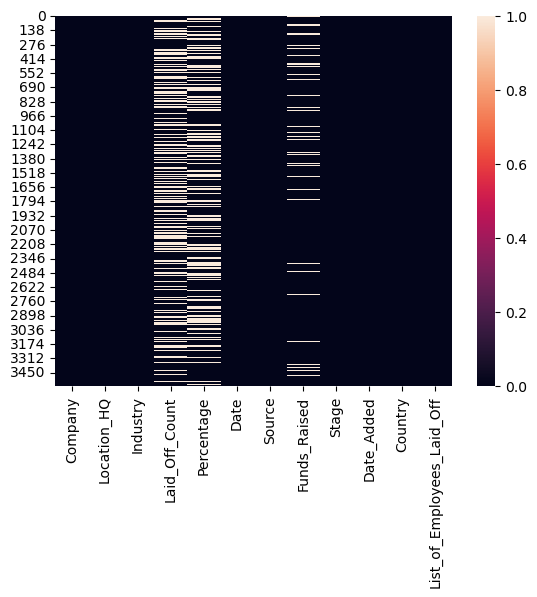

In [10]:
#visualizing null values
sns.heatmap(df.isnull())

In [11]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Display the percentage of null values for each column
print(null_percentage)

Company                        0.000000
Location_HQ                    0.000000
Industry                       0.000000
Laid_Off_Count                34.526139
Percentage                    35.700308
Date                           0.000000
Source                         0.000000
Funds_Raised                  10.707297
Stage                          0.000000
Date_Added                     0.000000
Country                        0.000000
List_of_Employees_Laid_Off     0.000000
dtype: float64


In the dataset, there are three key variables that demand attention due to the presence of null values: "laid_off_count" ,"percentage," and "funds_raised". Of these, "laid_off_count" and "percentage" exhibit null values exceeding 20% of the total data points. Given the substantial proportion of missing data in these variables, it is prudent to remove them from the analysis to ensure the reliability of the results.

The column "funds_raised" has about 10% missing values. Normally, when we have missing data, we might fill in those gaps with the average or middle value from the rest of the data. However, with "funds_raised," this might not be a good idea. Why? Because how much money a company raises can vary a lot, and it's influenced by many things.

If we just fill in the missing values with an average or middle value, it could make it seem like all the companies raised about the same amount of money, which might not be true. So, to keep our data accurate and avoid making wrong conclusions, we're leaving the missing values in "funds_raised" as they are. We're still going to use the rest of the data for our analysis, but we'll be careful not to make assumptions about the missing values in "funds_raised." or maybe just fill them with 0.


In [12]:
df.dropna(subset=["Laid_Off_Count", "Percentage"], inplace=True)
df

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,True Anomaly,Denver,Aerospace,30.0,0.25,2024-04-25T00:00:00.000Z,https://techcrunch.com/2024/04/25/defense-spac...,158.0,Series B,2024-04-26T15:58:59.000Z,United States,Unknown
3,Freenome,SF Bay Area,Healthcare,100.0,0.20,2024-04-23T00:00:00.000Z,https://www.sfchronicle.com/bayarea/article/te...,1400.0,Series E,2024-04-24T15:01:03.000Z,United States,Unknown
4,Heureka Group,Prague,Retail,100.0,0.16,2024-04-23T00:00:00.000Z,https://cc.cz/heureka-hromadne-propustila-stov...,NaN,Acquired,2024-04-24T15:06:41.000Z,Czech Republic,Unknown
7,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18T00:00:00.000Z,https://economictimes.indiatimes.com/tech/tech...,180.0,Unknown,2024-04-18T23:24:51.000Z,India,Unknown
8,Showpad,Ghent,Marketing,50.0,0.10,2024-04-18T00:00:00.000Z,https://www.tijd.be/ondernemen/technologie/tec...,159.0,Series D,2024-04-24T15:04:26.000Z,Belgium,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3570,Inspirato,Denver,Travel,130.0,0.22,2020-03-16T00:00:00.000Z,https://businessden.com/2020/03/16/inspirato-c...,79.0,Series C,2020-03-31T14:45:56.000Z,United States,Unknown
3571,Help.com,Austin,Support,16.0,1.00,2020-03-16T00:00:00.000Z,LinkedIn,6.0,Seed,2020-04-16T06:36:06.000Z,United States,Unknown
3573,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13T00:00:00.000Z,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03T04:47:03.000Z,United States,Unknown
3574,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13T00:00:00.000Z,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17T00:12:49.000Z,United States,Unknown


In [13]:
df.isnull().sum()

Company                         0
Location_HQ                     0
Industry                        0
Laid_Off_Count                  0
Percentage                      0
Date                            0
Source                          0
Funds_Raised                  157
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      0
dtype: int64

successfully deleted the null values from two columns.

In [14]:
df['Funds_Raised'].fillna(0, inplace=True)

In [15]:
df.isnull().sum()

Company                       0
Location_HQ                   0
Industry                      0
Laid_Off_Count                0
Percentage                    0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
List_of_Employees_Laid_Off    0
dtype: int64

Successfully handled the null values 

In [16]:
#Deleting unnecessary columns
df.drop(columns=['Date_Added','Source','List_of_Employees_Laid_Off'],inplace=True)


In [17]:
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Funds_Raised', 'Stage', 'Country'],
      dtype='object')

In [18]:
#Correcting Columns name 
col=df.columns
for x in col:
    df.rename(columns=lambda x: x.strip().lower(),inplace=True)

In [19]:
df.columns

Index(['company', 'location_hq', 'industry', 'laid_off_count', 'percentage',
       'date', 'funds_raised', 'stage', 'country'],
      dtype='object')

In [20]:
df.rename(columns={'location_hq':'location'},inplace=True)

In [21]:
df['country'].unique()

array(['United States', 'Czech Republic', 'India', 'Belgium', 'France',
       'Denmark', 'Israel', 'Singapore', 'Netherlands', 'Australia',
       'United Kingdom', 'Sweden', 'Norway', 'Canada', 'Cayman Islands',
       'Germany', 'Brazil', 'Estonia', 'Kenya', 'New Zealand', 'Ireland',
       'Nigeria', 'South Korea', 'Chile', 'Saudi Arabia', 'Poland',
       'Spain', 'Austria', 'Indonesia', 'China', 'Argentina',
       'Luxembourg', 'Thailand', 'Senegal', 'Hong Kong',
       'United Arab Emirates', 'Finland', 'Malaysia', 'Mexico', 'Russia',
       'Seychelles', 'Bulgaria', 'Switzerland', 'Portugal', 'Myanmar'],
      dtype=object)

In [22]:
df['country'].nunique()

45

In [23]:
df['stage'].nunique()

16

In [24]:
df['stage'].unique()

array(['Series B', 'Series E', 'Acquired', 'Unknown', 'Series D',
       'Post-IPO', 'Series C', 'Private Equity', 'Series A', 'Series F',
       'Subsidiary', 'Series H', 'Series G', 'Seed', 'Series I',
       'Series J'], dtype=object)

In [25]:
df['laid_off_count']=df['laid_off_count'].astype(int)

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
print(df['date'].dtype)

datetime64[ns, UTC]


In [28]:
df.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country
0,True Anomaly,Denver,Aerospace,30,0.25,2024-04-25 00:00:00+00:00,158.0,Series B,United States
3,Freenome,SF Bay Area,Healthcare,100,0.20,2024-04-23 00:00:00+00:00,1400.0,Series E,United States
4,Heureka Group,Prague,Retail,100,0.16,2024-04-23 00:00:00+00:00,0.0,Acquired,Czech Republic
7,The Good Glamm Group,New Delhi,Retail,150,0.15,2024-04-18 00:00:00+00:00,180.0,Unknown,India
8,Showpad,Ghent,Marketing,50,0.10,2024-04-18 00:00:00+00:00,159.0,Series D,Belgium


In [29]:
df['date'] = df['date'].dt.tz_localize(None)

In [30]:
df.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country
0,True Anomaly,Denver,Aerospace,30,0.25,2024-04-25,158.0,Series B,United States
3,Freenome,SF Bay Area,Healthcare,100,0.20,2024-04-23,1400.0,Series E,United States
4,Heureka Group,Prague,Retail,100,0.16,2024-04-23,0.0,Acquired,Czech Republic
7,The Good Glamm Group,New Delhi,Retail,150,0.15,2024-04-18,180.0,Unknown,India
8,Showpad,Ghent,Marketing,50,0.10,2024-04-18,159.0,Series D,Belgium


In [31]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()
df['year'] = df['date'].dt.year

In [32]:
df.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
0,True Anomaly,Denver,Aerospace,30,0.25,2024-04-25,158.0,Series B,United States,4,Thursday,2024
3,Freenome,SF Bay Area,Healthcare,100,0.20,2024-04-23,1400.0,Series E,United States,4,Tuesday,2024
4,Heureka Group,Prague,Retail,100,0.16,2024-04-23,0.0,Acquired,Czech Republic,4,Tuesday,2024
7,The Good Glamm Group,New Delhi,Retail,150,0.15,2024-04-18,180.0,Unknown,India,4,Thursday,2024
8,Showpad,Ghent,Marketing,50,0.10,2024-04-18,159.0,Series D,Belgium,4,Thursday,2024


In [33]:
df['year'].unique()

array([2024, 2023, 2022, 2021, 2020])

In [34]:
df['month'].unique()

array([ 4,  3,  2,  1, 12, 11, 10,  9,  8,  7,  6,  5])

# Exploratory Data Analysis

## Q1.Layoffs done in each year?

In [35]:
#how many layoffs are done in each year 
df.groupby('year')['laid_off_count'].sum()

year
2020     70621
2021      6503
2022    139920
2023    197498
2024     65882
Name: laid_off_count, dtype: int32

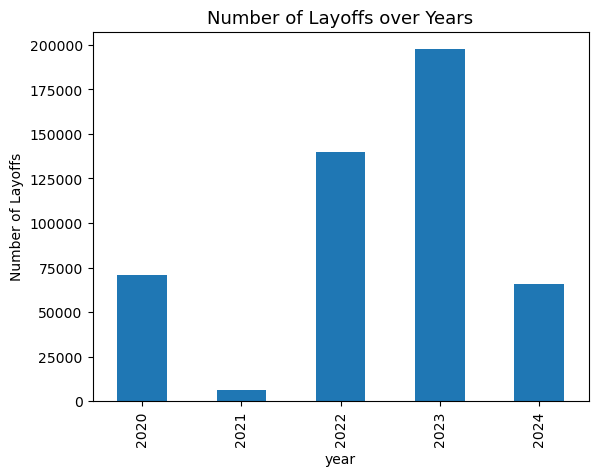

In [36]:
df.groupby('year')['laid_off_count'].sum().plot(kind='bar')
plt.ylabel('Number of Layoffs')
plt.title('Number of Layoffs over Years',size=13)
plt.show()


As per the graph ,most of the layoffs were in 2023 and 2022. This maybe due to the overhiring during covid-19 pandemic.Now we cant say much about 2024 because the data is available till april month but as you can see from jan to april the layoffs are still high.

## Q2. What are the top 5 companies that experienced layoffs during the years 2020, 2021, 2022, 2023, and 2024?

In [37]:
df0 = df.set_index('date')
df_2024 = df.loc[:'2024']
df_2023 = df.loc[(df0.index > '2023-01-01')&(df0.index < '2024-01-01')]
df_2022 = df.loc[(df0.index > '2022-01-01')&(df0.index < '2023-01-01')]
df_2021 = df.loc[(df0.index > '2021-01-01')&(df0.index < '2022-01-01')]
df_2020 = df.loc[(df0.index > '2020-01-01')&(df0.index < '2021-01-01')]

In [38]:
df_2024_most_layoffs = df_2024.sort_values(by='laid_off_count', ascending=False)
df_2024_most_layoffs.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
16,Tesla,Austin,Transportation,14000,0.10,2024-04-15,20200.0,Post-IPO,United States,4,Monday,2024
1478,Google,SF Bay Area,Consumer,12000,0.06,2023-01-20,26.0,Post-IPO,United States,1,Friday,2023
1962,Meta,SF Bay Area,Consumer,11000,0.13,2022-11-09,26000.0,Post-IPO,United States,11,Wednesday,2022
1511,Microsoft,Seattle,Other,10000,0.05,2023-01-18,1.0,Post-IPO,United States,1,Wednesday,2023
1894,Amazon,Seattle,Retail,10000,0.03,2022-11-16,108.0,Post-IPO,United States,11,Wednesday,2022


In [39]:
df_2023_most_layoffs = df_2023.sort_values(by='laid_off_count', ascending=False)
df_2023_most_layoffs.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
1478,Google,SF Bay Area,Consumer,12000,0.06,2023-01-20,26.0,Post-IPO,United States,1,Friday,2023
1511,Microsoft,Seattle,Other,10000,0.05,2023-01-18,1.0,Post-IPO,United States,1,Wednesday,2023
1223,Ericsson,Stockholm,Other,8500,0.08,2023-02-24,663.0,Post-IPO,Sweden,2,Friday,2023
1653,Amazon,Seattle,Retail,8000,0.02,2023-01-04,108.0,Post-IPO,United States,1,Wednesday,2023
1011,Flink,Berlin,Food,8000,0.40,2023-04-24,1000.0,Series B,Germany,4,Monday,2023


In [40]:
df_2022_most_layoffs = df_2022.sort_values(by='laid_off_count', ascending=False)
df_2022_most_layoffs.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
1962,Meta,SF Bay Area,Consumer,11000,0.13,2022-11-09,26000.0,Post-IPO,United States,11,Wednesday,2022
1894,Amazon,Seattle,Retail,10000,0.03,2022-11-16,108.0,Post-IPO,United States,11,Wednesday,2022
1895,Cisco,SF Bay Area,Infrastructure,4100,0.05,2022-11-16,2.0,Post-IPO,United States,11,Wednesday,2022
2064,Philips,Amsterdam,Healthcare,4000,0.05,2022-10-24,0.0,Post-IPO,Netherlands,10,Monday,2022
1994,Twitter,SF Bay Area,Consumer,3700,0.50,2022-11-04,12900.0,Post-IPO,United States,11,Friday,2022


In [41]:
df_2021_most_layoffs = df_2021.sort_values(by='laid_off_count', ascending=False)
df_2021_most_layoffs.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
2914,Katerra,SF Bay Area,Construction,2434,1.00,2021-06-01,1600.0,Unknown,United States,6,Tuesday,2021
2902,Zillow,Seattle,Real Estate,2000,0.25,2021-11-02,97.0,Post-IPO,United States,11,Tuesday,2021
2900,Better.com,New York City,Real Estate,900,0.09,2021-12-01,905.0,Unknown,United States,12,Wednesday,2021
2938,Dropbox,SF Bay Area,Other,315,0.15,2021-01-13,1700.0,Post-IPO,United States,1,Wednesday,2021
2926,Bounce,Bengaluru,Transportation,200,0.40,2021-02-22,214.2,Series D,India,2,Monday,2021


In [42]:
df_2020_most_layoffs = df_2020.sort_values(by='laid_off_count', ascending=False)
df_2020_most_layoffs.head()

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
3000,Booking.com,Amsterdam,Travel,4375,0.25,2020-07-30,0.0,Acquired,Netherlands,7,Thursday,2020
3150,Uber,SF Bay Area,Transportation,3700,0.14,2020-05-06,24700.0,Post-IPO,United States,5,Wednesday,2020
3104,Uber,SF Bay Area,Transportation,3000,0.13,2020-05-18,24700.0,Post-IPO,United States,5,Monday,2020
3305,Groupon,Chicago,Retail,2800,0.44,2020-04-13,1400.0,Post-IPO,United States,4,Monday,2020
3157,Airbnb,SF Bay Area,Travel,1900,0.25,2020-05-05,5400.0,Private Equity,United States,5,Tuesday,2020


This analysis highlights a significant trend: the majority of layoffs, year after year, are attributed to top companies situated in the United States. This observation underscores the profound influence of the pandemic on the U.S. job market, emphasizing the widespread ramifications of economic disruptions and organizational restructuring efforts within the nation's leading firms.
Also this year in 2024 ,from january to April ,layoffs are most in US.

# Q3.Fund raised over years?

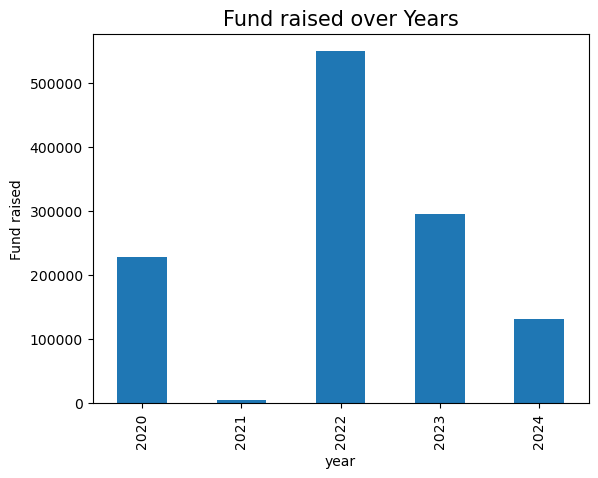

In [43]:
# fund raised in each year 
df.groupby('year')['funds_raised'].sum().plot(kind='bar')
plt.ylabel('Fund raised')
plt.title('Fund raised over Years',size=15)
plt.show()

# Q4. Fund raised across countries?

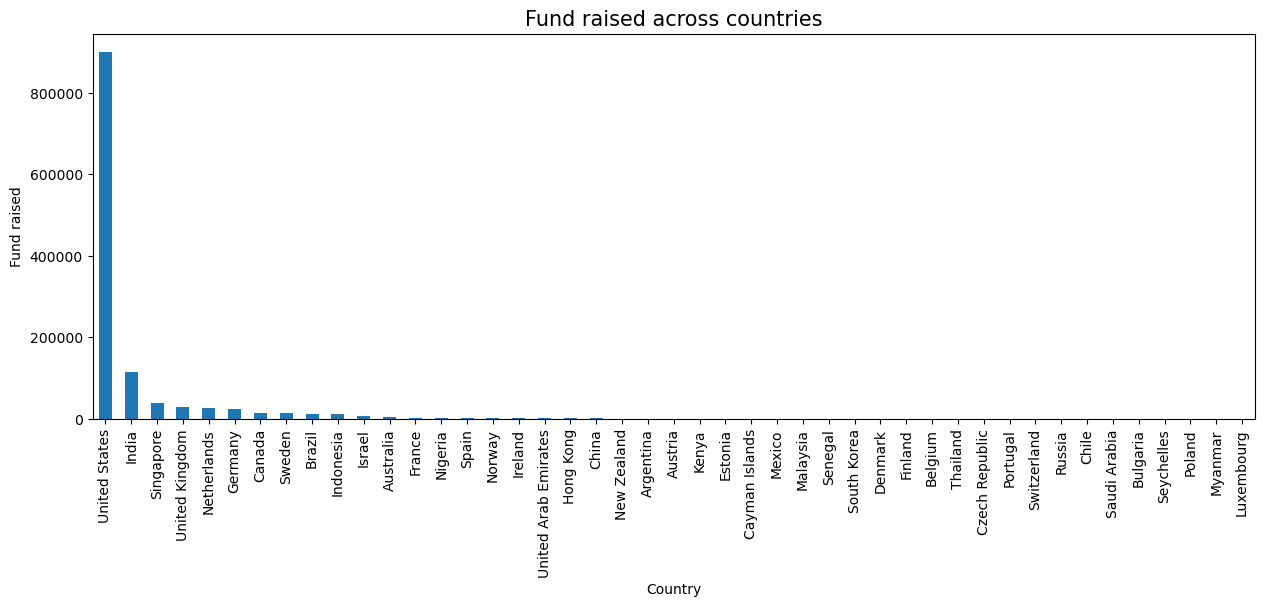

In [44]:
plt.figure(figsize=(15,5))
df.groupby('country')['funds_raised'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Fund raised')
plt.xlabel('Country')
plt.title('Fund raised across countries',size=15)
plt.show()

## Q5 Number of Layoffs across different countries?

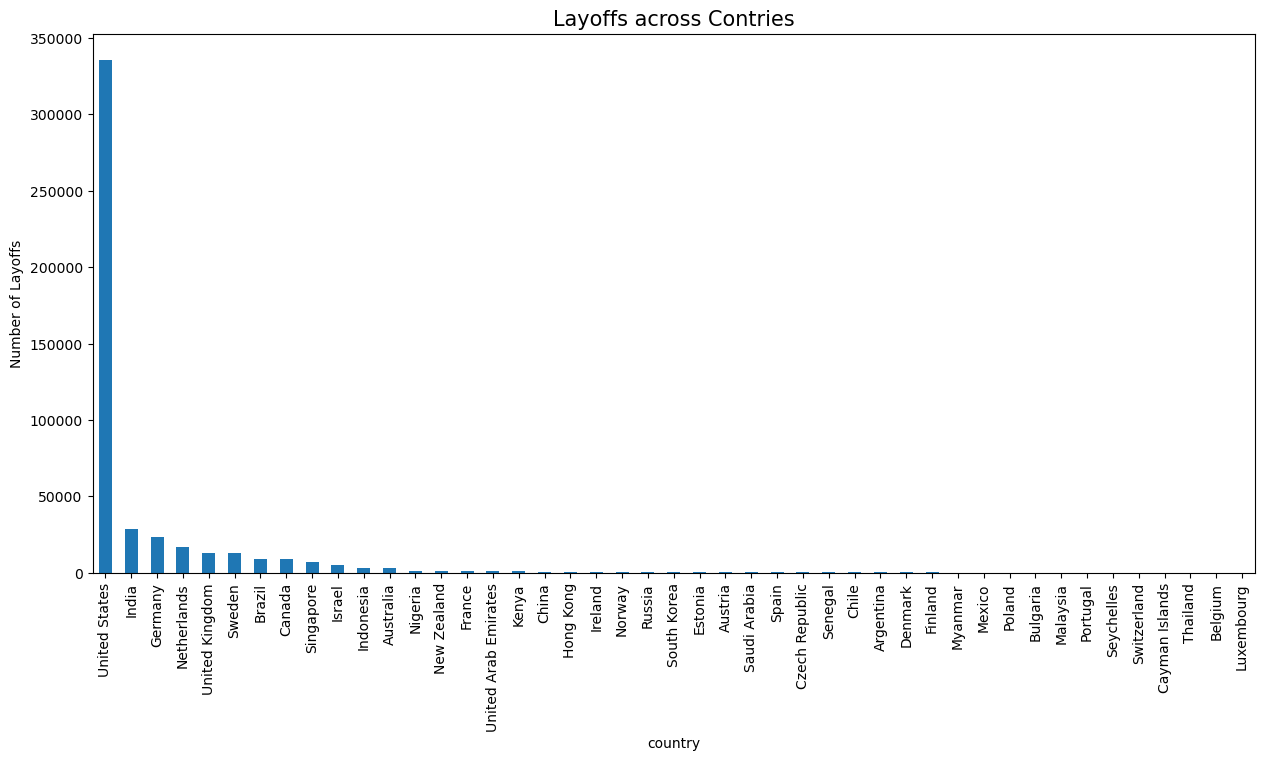

In [45]:
plt.figure(figsize=(15,7))
df.groupby('country')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Layoffs')
plt.title('Layoffs across Contries',size=15)
plt.show()

This analysis reveals that the United States, India, Germany, the Netherlands, the United Kingdom, and Sweden stand out as the countries most profoundly impacted thus far.

## Q6 Layoffs within industries?

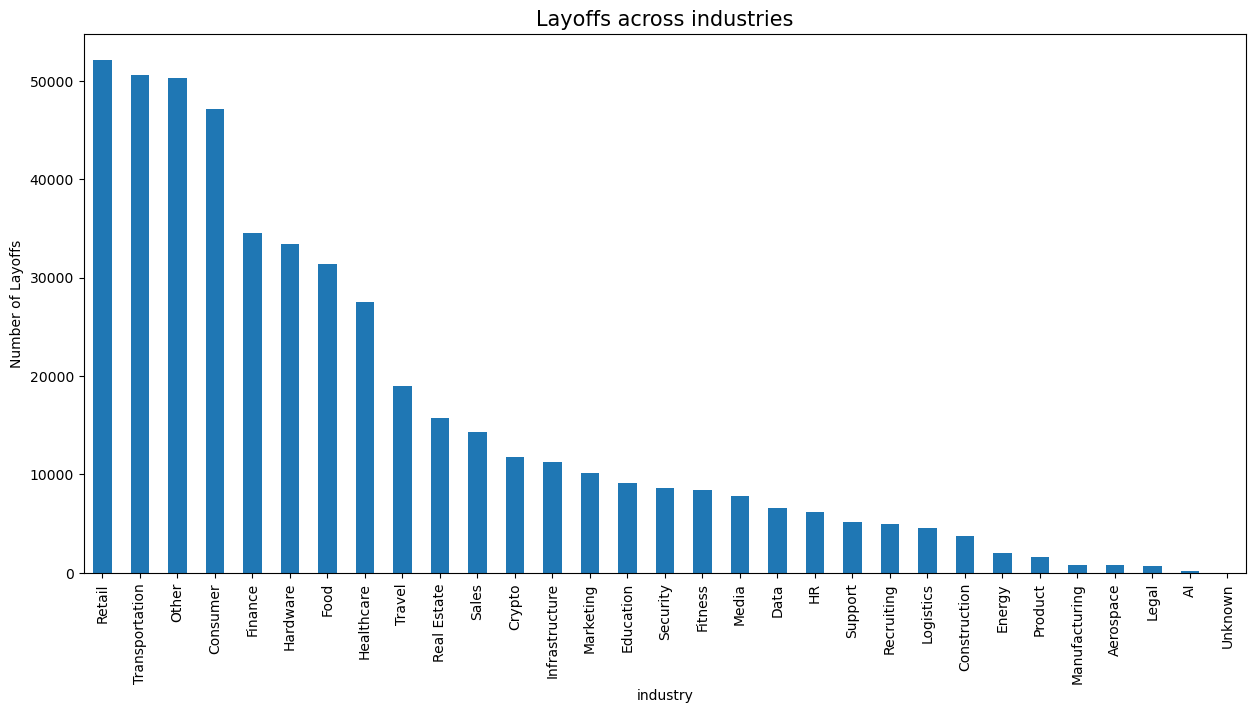

In [46]:
plt.figure(figsize=(15,7))
df.groupby('industry')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Layoffs')
plt.title('Layoffs across industries',size=15)
plt.show()

## Q7. Average layoffs for each industry?

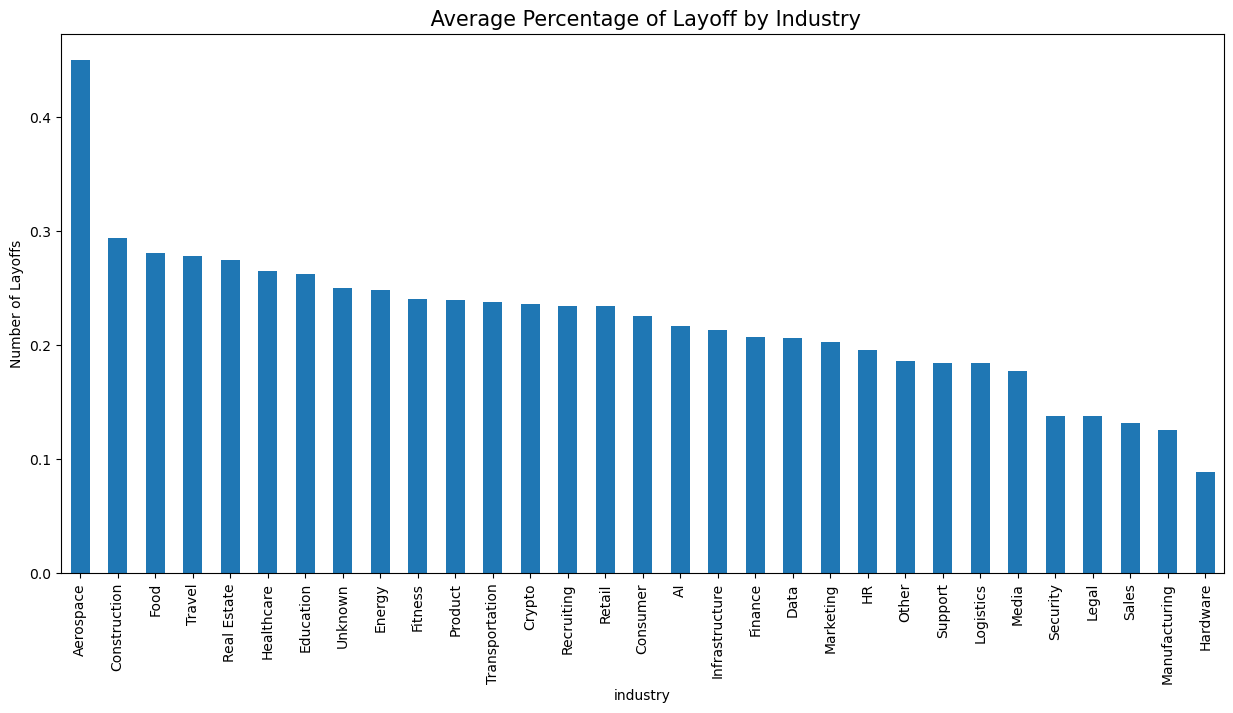

In [47]:
plt.figure(figsize=(15,7))
df.groupby('industry')['percentage'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Layoffs')
plt.title(' Average Percentage of Layoff by Industry',size=15)
plt.show()

## Q8. Layoffs by stage?

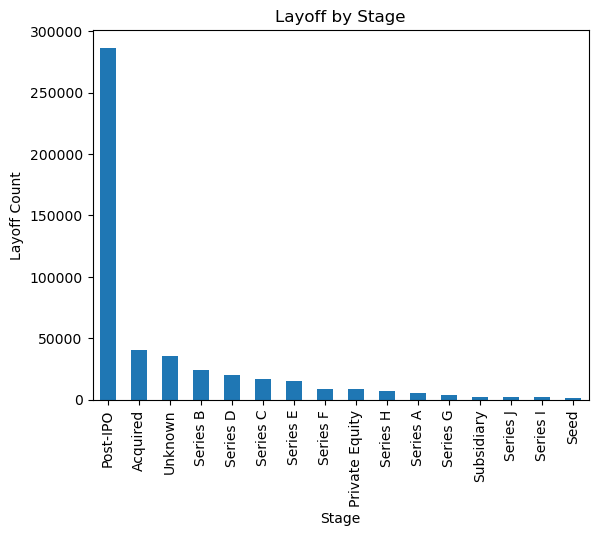

In [48]:
#find layoff by stage
df.groupby('stage')['laid_off_count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Layoff by Stage')
plt.xlabel('Stage')
plt.ylabel('Layoff Count');

Maturity and Stability: Established companies at later stages of development, such as those in the post-IPO or mature stages, typically have more stable operations and a diversified revenue base. Layoffs in these stages may occur due to strategic realignment, cost-cutting initiatives, or market fluctuations affecting specific business units or regions.

## Q10. Layoffs by month 

In [49]:
#layoff by month for year 2020
df20 = df.query('year == 2020')
df1 = df20.groupby('month')['laid_off_count'].sum().to_frame()
df1.rename(columns={'laid_off_count':'layoff_2020'},inplace=True)
df1

,layoff_2020
month,
3,7558
4,22350
5,24488
6,7023
7,6573
8,1853
9,339
10,110
11,207


In [50]:
df21 = df.query('year == 2021')
df2 = df21.groupby('month')['laid_off_count'].sum().to_frame()
df2.rename(columns={'laid_off_count':'layoff_2021'},inplace=True)
df2
    

,layoff_2021
month,
1,516
2,345
4,160
6,2434
8,37
9,41
11,2070
12,900


In [51]:
df22 = df.query('year == 2022')
df3 = df22.groupby('month')['laid_off_count'].sum().to_frame()
df3.rename(columns={'laid_off_count':'layoff_2022'},inplace=True)
df3
    

,layoff_2022
month,
1,80
2,3385
3,4514
4,2581
5,11835
6,15721
7,10395
8,11043
9,3893


In [52]:
df23 = df.query('year == 2023')
df4 = df23.groupby('month')['laid_off_count'].sum().to_frame()
df4.rename(columns={'laid_off_count':'layoff_2023'},inplace=True)
df4
    

,layoff_2023
month,
1,82988
2,34715
3,10878
4,18180
5,12654
6,6057
7,6787
8,8094
9,2802


In [53]:
df24 = df.query('year == 2024')
df5 = df24.groupby('month')['laid_off_count'].sum().to_frame()
df5.rename(columns={'laid_off_count':'layoff_2024'},inplace=True)
df5
    

,layoff_2024
month,
1,28487
2,13824
3,7229
4,16342


In [54]:
df_comb= pd.concat([df5,df4,df3,df2,df1], axis=1)
df_comb

,layoff_2024,layoff_2023,layoff_2022,layoff_2021,layoff_2020
month,,,,,
1,28487.0,82988,80,516.0,NaN
2,13824.0,34715,3385,345.0,NaN
3,7229.0,10878,4514,NaN,7558.0
4,16342.0,18180,2581,160.0,22350.0
5,NaN,12654,11835,NaN,24488.0
6,NaN,6057,15721,2434.0,7023.0
7,NaN,6787,10395,NaN,6573.0
8,NaN,8094,11043,37.0,1853.0
9,NaN,2802,3893,41.0,339.0


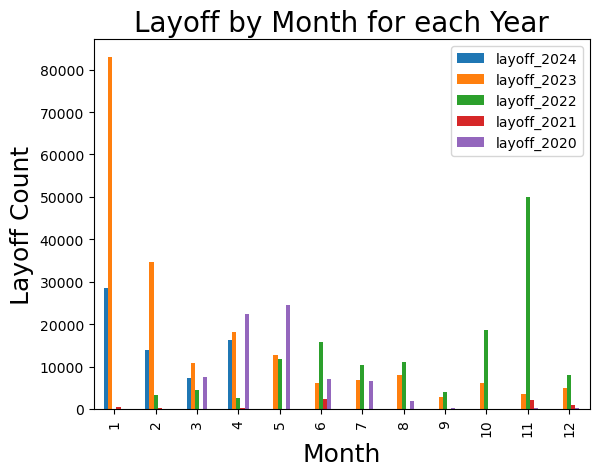

In [55]:
df_comb.plot(kind='bar')
plt.title('Layoff by Month for each Year',size=20)
plt.xlabel('Month',size=18)
plt.ylabel('Layoff Count',size=18);

## Q11.Top 10 fund raised companies

In [56]:
#top 10 funds raised companies
df.groupby('company')['funds_raised'].sum().nlargest(10)

company
Netflix    243800.0
Uber        98800.0
Xerox       27200.0
Grab        26400.0
Meta        26000.0
Twitter     25800.0
Cruise      20300.0
Tesla       20200.0
Lyft        19600.0
WeWork      19500.0
Name: funds_raised, dtype: float64

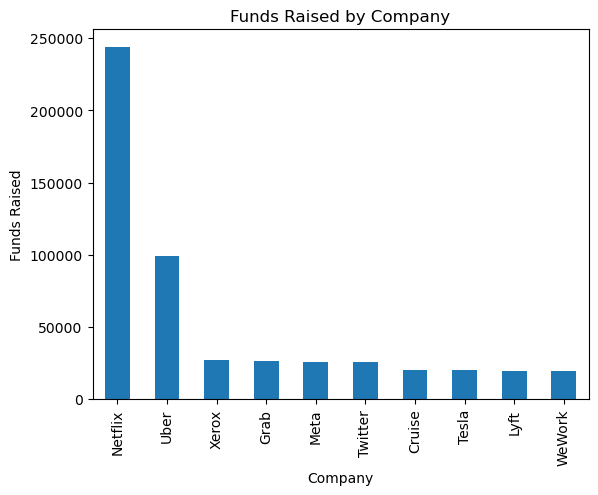

In [57]:
df.groupby('company')['funds_raised'].sum().nlargest(10).plot(kind='bar')
plt.title('Funds Raised by Company')
plt.xlabel('Company')
plt.ylabel('Funds Raised');

## Q 12. bankrupt companies?

In [58]:
#filter the data frame to get the number of the companies that went bankrupt
df_bankrupt = df.query('percentage == 1')
df_bankrupt

,company,location,industry,laid_off_count,percentage,date,funds_raised,stage,country,month,day,year
27,Trendsales,Copenhagen,Retail,79,1.0,2024-04-08,0.0,Acquired,Denmark,4,Monday,2024
34,Ghost Autonomy,SF Bay Area,Transportation,100,1.0,2024-04-03,247.0,Series E,United States,4,Wednesday,2024
65,Phantom Auto,SF Bay Area,Transportation,100,1.0,2024-03-12,86.0,Unknown,United States,3,Tuesday,2024
67,Deadspin,New York City,Media,11,1.0,2024-03-11,0.0,Acquired,United States,3,Monday,2024
81,Project Ronin,SF Bay Area,Healthcare,150,1.0,2024-03-01,0.0,Unknown,United States,3,Friday,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
3486,Amplero,Seattle,Marketing,17,1.0,2020-03-29,25.0,Series B,United States,3,Sunday,2020
3493,HOOQ,Singapore,Consumer,250,1.0,2020-03-27,95.0,Unknown,Singapore,3,Friday,2020
3521,Consider.co,SF Bay Area,Other,13,1.0,2020-03-26,5.0,Seed,United States,3,Thursday,2020
3563,Ejento,SF Bay Area,Recruiting,84,1.0,2020-03-19,0.0,Unknown,United States,3,Thursday,2020


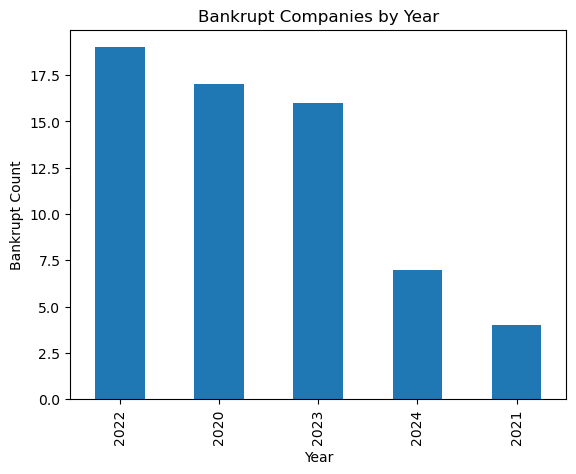

In [59]:
#plotting it with bar chart
df_bankrupt.year.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Year')
plt.xlabel('Year')
plt.ylabel('Bankrupt Count');

In [60]:
#bankrupt companies by country
df_bankrupt.country.value_counts()

country
United States     36
Australia          5
United Kingdom     4
India              3
Germany            3
Singapore          3
Denmark            2
Israel             2
Ireland            1
Nigeria            1
Canada             1
Indonesia          1
Brazil             1
Name: count, dtype: int64

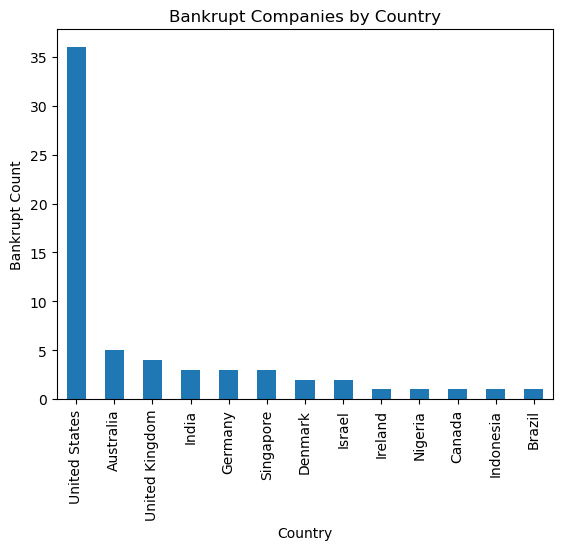

In [61]:
#plotting it with bar chart
df_bankrupt.country.value_counts().plot(kind='bar')
plt.title('Bankrupt Companies by Country')
plt.xlabel('Country')
plt.ylabel('Bankrupt Count');

## Q13. Layoffs in india across different location?

In [62]:
#create a data frame with only Indian companies
df_India = df.query('country == "India"')

In [63]:
#largest 10 location 
df_India.groupby('location')['laid_off_count'].sum().nlargest(10)

location
Bengaluru    19367
Gurugram      5696
New Delhi     1110
Mumbai         945
Ahmedabad      500
Chennai        450
Kolkata        125
Noida          120
Pune            30
Nashik          19
Name: laid_off_count, dtype: int32

## 14. Layoffs in United States in across different location?

In [64]:
df_US = df.query('country == "United States"')

In [65]:
#largest 10 location 
df_US.groupby('location')['laid_off_count'].sum().nlargest(10)

location
SF Bay Area      150795
Seattle           38513
New York City     31006
Austin            30949
Boston            13892
Los Angeles        8040
Chicago            7210
Boise              7200
Phoenix            4969
San Diego          4408
Name: laid_off_count, dtype: int32